Example from https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py
    
Train a simple deep CNN on the CIFAR10 small images dataset.

GPU run command with Theano backend (with TensorFlow, the GPU is automatically used):
    THEANO_FLAGS=mode=FAST_RUN,device=gpu,floatx=float32 python cifar10_cnn.py

It gets down to 0.65 test logloss in 25 epochs, and down to 0.55 after 50 epochs.
(it's still underfitting at that point, though).

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [3]:
batch_size = 32
num_classes = 10
epochs = 75  # 200
data_augmentation = False  # True

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


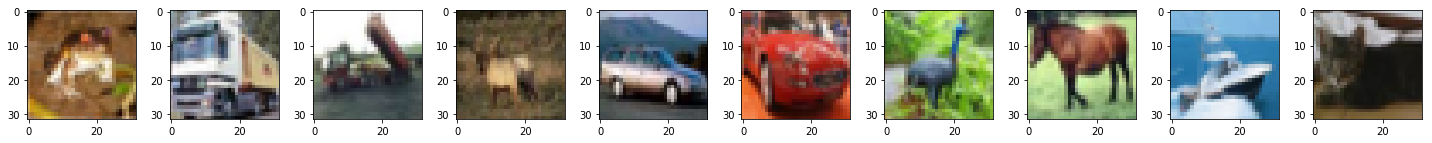

In [5]:
fig, ax = plt.subplots(1, 10, figsize=(20,3))
for i, a in enumerate(ax.flatten()):
    a.imshow(x_train[i])
fig.tight_layout()

Let's see examples from each of the 10 groups.

In [ ]:
fig, ax = plt.subplots(10, 10, figsize=(20,20))
for i, a in enumerate(ax.flatten()):
    class_ind = i // 10
    pic_ind = i % 10
    group = np.where(y_train.flatten() == class_ind)[0][pic_ind]
    a.imshow(x_train[group])
fig.tight_layout()

In [48]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [8]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [39]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=x_train.shape[0] // batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test))

Using real-time data augmentation.
Epoch 1/200
1562/1562 [==============================] - 186s - loss: 1.8810 - acc: 0.3064 - val_loss: 1.5943 - val_acc: 0.4292
Epoch 2/200
1562/1562 [==============================] - 183s - loss: 1.5859 - acc: 0.4183 - val_loss: 1.3994 - val_acc: 0.4958
Epoch 3/200
1562/1562 [==============================] - 184s - loss: 1.4486 - acc: 0.4763 - val_loss: 1.2811 - val_acc: 0.5431
Epoch 4/200
1562/1562 [==============================] - 185s - loss: 1.3492 - acc: 0.5148 - val_loss: 1.1874 - val_acc: 0.5822
Epoch 5/200
1562/1562 [==============================] - 186s - loss: 1.2663 - acc: 0.5470 - val_loss: 1.1014 - val_acc: 0.6089
Epoch 6/200
1562/1562 [==============================] - 178s - loss: 1.2058 - acc: 0.5711 - val_loss: 1.0400 - val_acc: 0.6301
Epoch 7/200
1562/1562 [==============================] - 179s - loss: 1.1576 - acc: 0.5871 - val_loss: 1.0032 - val_acc: 0.6449
Epoch 8/200
1562/1562 [==============================] - 178s - loss:

1562/1562 [==============================] - 177s - loss: 0.8724 - acc: 0.7173 - val_loss: 0.7786 - val_acc: 0.7494
Epoch 128/200
1562/1562 [==============================] - 177s - loss: 0.8785 - acc: 0.7181 - val_loss: 0.7861 - val_acc: 0.7494
Epoch 129/200
1562/1562 [==============================] - 177s - loss: 0.8748 - acc: 0.7185 - val_loss: 0.8391 - val_acc: 0.7278
Epoch 130/200
1562/1562 [==============================] - 177s - loss: 0.8777 - acc: 0.7158 - val_loss: 0.7937 - val_acc: 0.7363
Epoch 131/200
1562/1562 [==============================] - 177s - loss: 0.8876 - acc: 0.7109 - val_loss: 0.7648 - val_acc: 0.7690
Epoch 132/200
1562/1562 [==============================] - 178s - loss: 0.8859 - acc: 0.7141 - val_loss: 0.7369 - val_acc: 0.7618
Epoch 133/200
1562/1562 [==============================] - 177s - loss: 0.8968 - acc: 0.7116 - val_loss: 0.7127 - val_acc: 0.7689
Epoch 134/200
1562/1562 [==============================] - 177s - loss: 0.9021 - acc: 0.7102 - val_loss:

1562/1562 [==============================] - 173s - loss: 1.2900 - acc: 0.5896 - val_loss: 1.0151 - val_acc: 0.6666
Epoch 191/200
1562/1562 [==============================] - 175s - loss: 1.3004 - acc: 0.5871 - val_loss: 1.2370 - val_acc: 0.6181
Epoch 192/200
1562/1562 [==============================] - 174s - loss: 1.2889 - acc: 0.5854 - val_loss: 1.2002 - val_acc: 0.6662
Epoch 193/200
1562/1562 [==============================] - 174s - loss: 1.2934 - acc: 0.5888 - val_loss: 1.2745 - val_acc: 0.6410
Epoch 194/200
1562/1562 [==============================] - 174s - loss: 1.2985 - acc: 0.5857 - val_loss: 1.1193 - val_acc: 0.6057
Epoch 195/200
1562/1562 [==============================] - 175s - loss: 1.3013 - acc: 0.5866 - val_loss: 1.2408 - val_acc: 0.6052
Epoch 196/200
1562/1562 [==============================] - 174s - loss: 1.3212 - acc: 0.5822 - val_loss: 1.1510 - val_acc: 0.6417
Epoch 197/200
1562/1562 [==============================] - 174s - loss: 1.3069 - acc: 0.5854 - val_loss:

In [40]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
pred = model.predict_classes(x_test)

10000/10000 [==============================] - 9s     
Test loss: 1.09711257553
Test accuracy: 0.6532
 9952/10000 [============================>.] - ETA: 0s

In [41]:
# Reload the data to compare predictions vs. actual on test data:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(y_test.flatten()[:10])

[3 8 8 0 6 6 1 6 3 1]


Let's look at what the first group of images is made of...

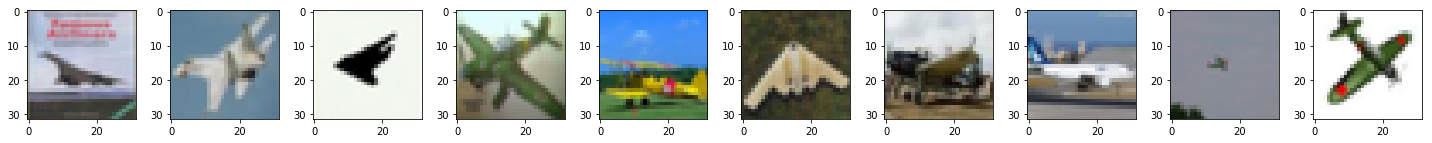

In [42]:
class_ind = 0
first_group = np.where(y_test.flatten() == class_ind)[0][:10]
fig, ax = plt.subplots(1, 10, figsize=(20,3))
for i, a in enumerate(ax.flatten()):
    a.imshow(x_test[first_group[i]])
fig.tight_layout()

OK, it's airplanes! Let's see what the nnet did...

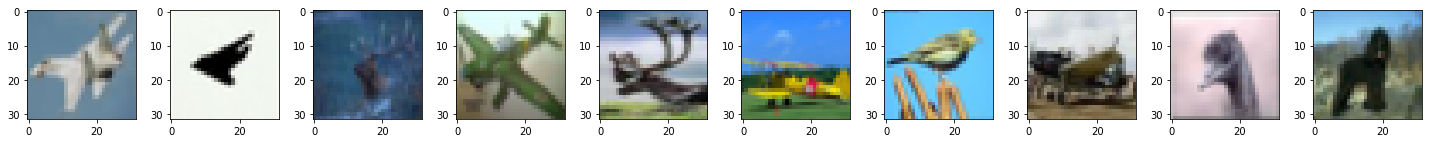

In [43]:
first_group = np.where(pred.flatten() == class_ind)[0][:10]
fig, ax = plt.subplots(1, 10, figsize=(20,3))
for i, a in enumerate(ax.flatten()):
    a.imshow(x_test[first_group[i]])
fig.tight_layout()

Let's see some examples that it got wrong.

In [44]:
print(np.mean(pred != y_test.flatten()))
inds = np.where(pred != y_test.flatten())[0]
print(inds[:20], '\n', pred[inds][:20], '\n', y_test.flatten()[inds][:20])

0.3468
[ 3  6 12 15 22 24 25 26 32 33 35 40 47 50 52 57 58 59 61 63] 
 [8 9 3 6 0 4 4 3 6 6 8 0 8 2 7 3 6 3 5 8] 
 [0 1 5 8 4 5 2 4 4 5 2 4 9 9 0 7 4 6 3 3]


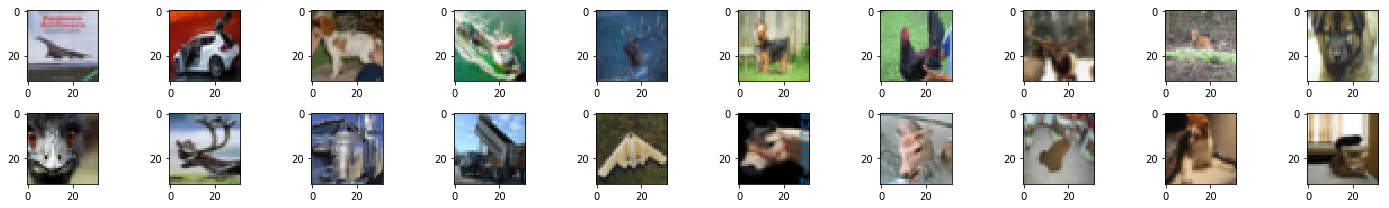

In [45]:
fig, ax = plt.subplots(2, 10, figsize=(20,3))
for i, a in enumerate(ax.flatten()):
    a.imshow(x_test[inds[i]])
fig.tight_layout()